## CAPSTONE PROJECT

## Data Preparation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import os

os.chdir('ml-100k')

print(os.getcwd())
print(os.listdir())

C:\Users\Elitebook\Downloads\ml-100k\ml-100k
['allbut.pl', 'mku.sh', 'README', 'u.data', 'u.genre', 'u.info', 'u.item', 'u.occupation', 'u.user', 'u1.base', 'u1.test', 'u2.base', 'u2.test', 'u3.base', 'u3.test', 'u4.base', 'u4.test', 'u5.base', 'u5.test', 'ua.base', 'ua.test', 'ub.base', 'ub.test']


In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=column_names)
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL'] + [f'genre_{i}' for i in range(19)]
movies = pd.read_csv('u.item', sep='|', names=columns, encoding='latin-1')
movies.head()


,movie_id,title,release_date,video_release_date,IMDb_URL,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=user_columns)
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
df = ratings.merge(users, on='user_id').merge(movies, left_on='item_id', right_on='movie_id')
df.head()


,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,movie_id,title,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,196,242,3,881250949,49,M,writer,55105,242,Kolya (1996),...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,302,L.A. Confidential (1997),...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,377,Heavyweights (1994),...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,51,Legends of the Fall (1994),...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,55113,346,Jackie Brown (1997),...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(100000, 32)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
item_id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0
age,100000.0,3.296985e+01,1.156262e+01,7.0,24.0,30.0,40.0,73.0
movie_id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
video_release_date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre_0,100000.0,1.000000e-04,9.999550e-03,0.0,0.0,0.0,0.0,1.0
genre_1,100000.0,2.558900e-01,4.363625e-01,0.0,0.0,0.0,1.0,1.0
genre_2,100000.0,1.375300e-01,3.444077e-01,0.0,0.0,0.0,0.0,1.0


In [9]:
df.isnull().sum()

user_id                    0
item_id                    0
rating                     0
timestamp                  0
age                        0
gender                     0
occupation                 0
zip_code                   0
movie_id                   0
title                      0
release_date               9
video_release_date    100000
IMDb_URL                  13
genre_0                    0
genre_1                    0
genre_2                    0
genre_3                    0
genre_4                    0
genre_5                    0
genre_6                    0
genre_7                    0
genre_8                    0
genre_9                    0
genre_10                   0
genre_11                   0
genre_12                   0
genre_13                   0
genre_14                   0
genre_15                   0
genre_16                   0
genre_17                   0
genre_18                   0
dtype: int64

In [10]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip_code', 'movie_id', 'title', 'release_date',
       'video_release_date', 'IMDb_URL', 'genre_0', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7', 'genre_8',
       'genre_9', 'genre_10', 'genre_11', 'genre_12', 'genre_13', 'genre_14',
       'genre_15', 'genre_16', 'genre_17', 'genre_18'],
      dtype='object')

In [11]:
genre_mapping = {}
with open('u.genre', 'r') as f:
    for line in f:
        if line.strip() != '':
            name, idx = line.strip().split('|')
            genre_mapping[f'genre_{idx}'] = name

# Check mapping
print(genre_mapping)


{'genre_0': 'unknown', 'genre_1': 'Action', 'genre_2': 'Adventure', 'genre_3': 'Animation', 'genre_4': "Children's", 'genre_5': 'Comedy', 'genre_6': 'Crime', 'genre_7': 'Documentary', 'genre_8': 'Drama', 'genre_9': 'Fantasy', 'genre_10': 'Film-Noir', 'genre_11': 'Horror', 'genre_12': 'Musical', 'genre_13': 'Mystery', 'genre_14': 'Romance', 'genre_15': 'Sci-Fi', 'genre_16': 'Thriller', 'genre_17': 'War', 'genre_18': 'Western'}


In [12]:
# Rename columns
df.rename(columns=genre_mapping, inplace=True)
df[genre_mapping.values()].head()


,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [13]:
df.head

<bound method NDFrame.head of        user_id  item_id  rating  timestamp  age gender     occupation  \
0          196      242       3  881250949   49      M         writer   
1          186      302       3  891717742   39      F      executive   
2           22      377       1  878887116   25      M         writer   
3          244       51       2  880606923   28      M     technician   
4          166      346       1  886397596   47      M       educator   
...        ...      ...     ...        ...  ...    ...            ...   
99995      880      476       3  880175444   13      M        student   
99996      716      204       5  879795543   36      F  administrator   
99997      276     1090       1  874795795   21      M        student   
99998       13      225       2  882399156   47      M       educator   
99999       12      203       3  879959583   28      F          other   

      zip_code  movie_id                         title  ... Fantasy  \
0        55105       2

In [56]:
df.to_csv('combined_dataset.csv', index=False)


In [57]:
from IPython.display import FileLink
FileLink('combined_dataset.csv')


C:\Users\Elitebook\Downloads\ml-100k\ml-100k\combined_dataset.csv

In [14]:
df = df.dropna(subset=['release_date'])


In [15]:
df = df.drop(columns=['video_release_date', 'IMDb_URL'])


In [16]:
df.isnull().sum()

user_id         0
item_id         0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip_code        0
movie_id        0
title           0
release_date    0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

## Exploratory Data Analysis

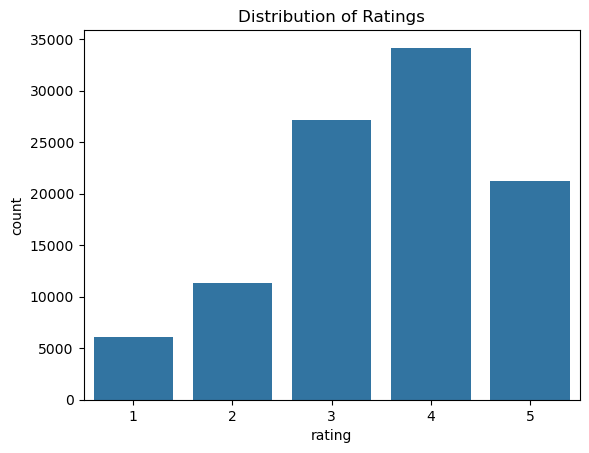

In [17]:
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

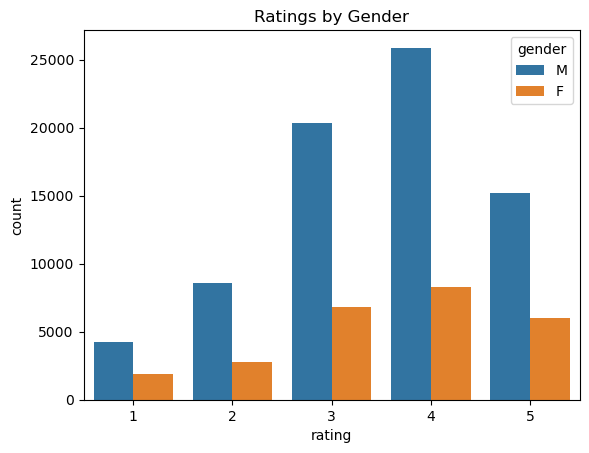

In [18]:
sns.countplot(x='rating', hue='gender', data=df)
plt.title('Ratings by Gender')
plt.show()

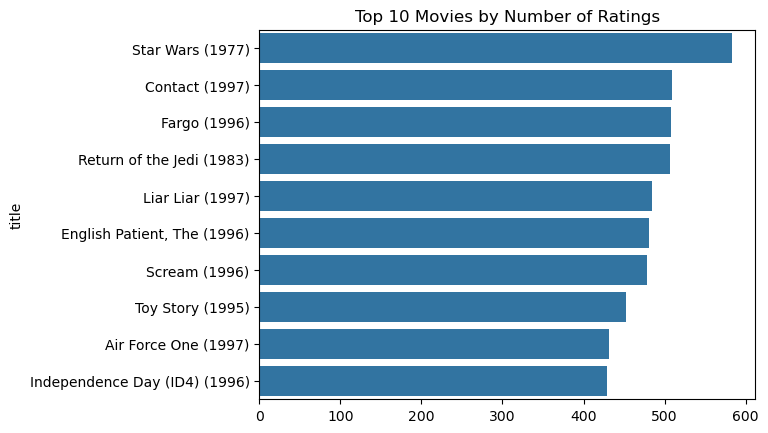

In [19]:
top_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
sns.barplot(x=top_movies.values, y=top_movies.index)
plt.title('Top 10 Movies by Number of Ratings')
plt.show()


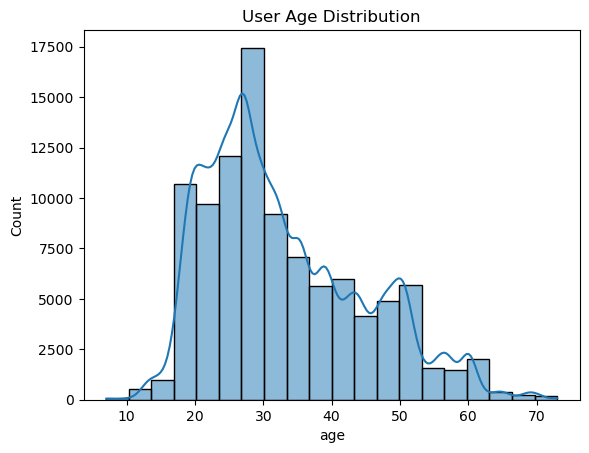

In [20]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('User Age Distribution')
plt.show()

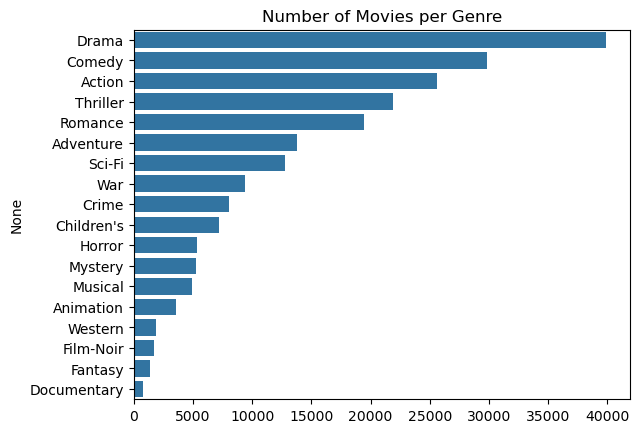

In [21]:
genre_cols = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_counts = df[genre_cols].sum().sort_values(ascending=False)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Number of Movies per Genre')
plt.show()


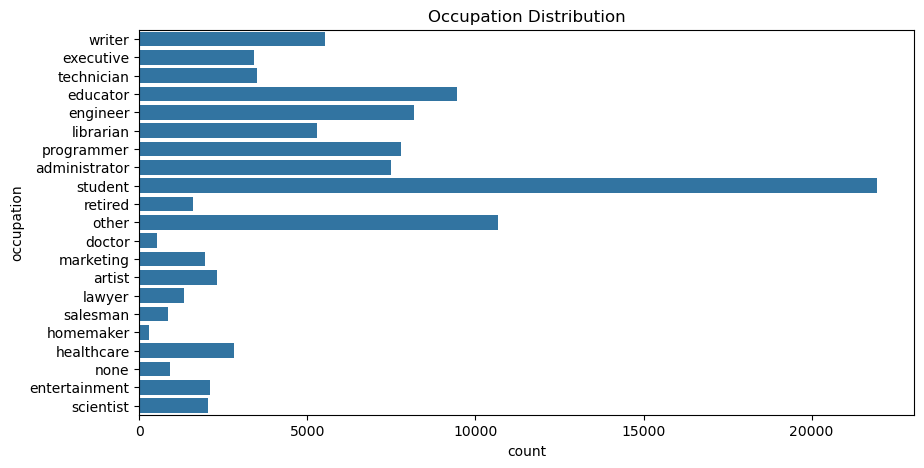

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(y='occupation', data=df)
plt.title('Occupation Distribution')
plt.show()


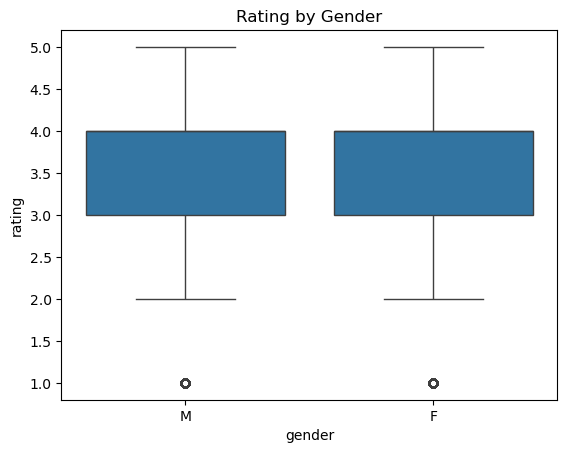

In [23]:
sns.boxplot(x='gender', y='rating', data=df)
plt.title('Rating by Gender')
plt.show()


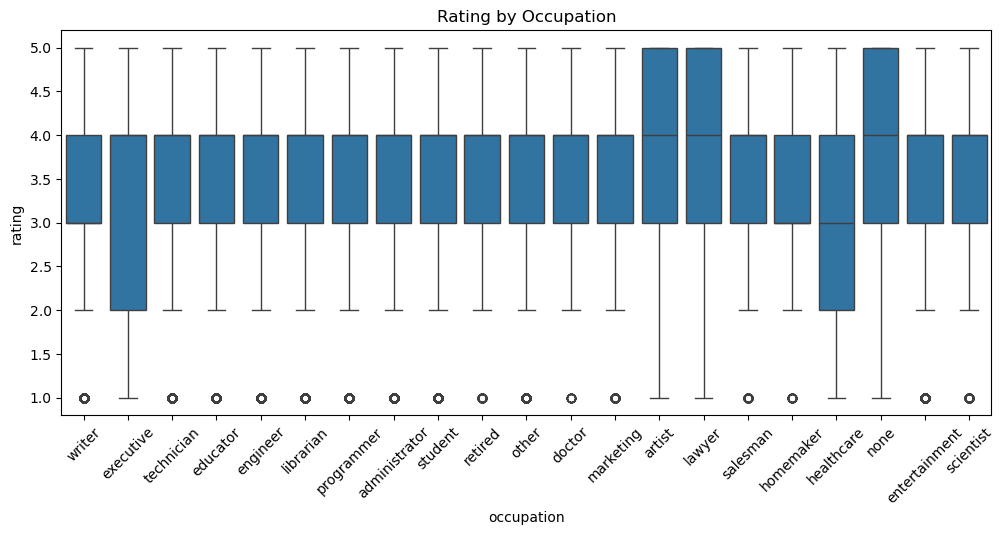

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(x='occupation', y='rating', data=df)
plt.xticks(rotation=45)
plt.title('Rating by Occupation')
plt.show()


In [25]:
df['liked'] = (df['rating'] >= 4).astype(int)


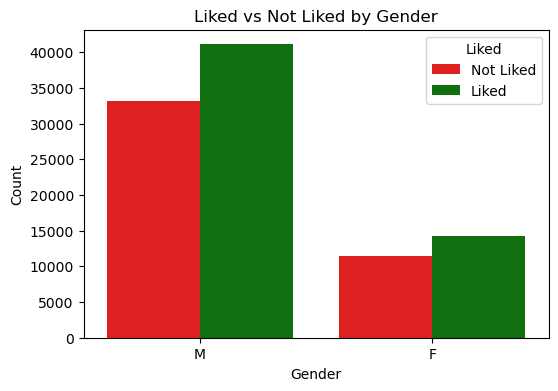

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='liked', data=df, palette={0:'red', 1:'green'})
plt.title('Liked vs Not Liked by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Liked', labels=['Not Liked', 'Liked'])
plt.show()




Average liked rate per genre:
 Drama          0.444374
Comedy         0.269930
Action         0.244428
Thriller       0.215369
Romance        0.206628
Adventure      0.132545
Sci-Fi         0.129872
War            0.112859
Crime          0.086653
Children's     0.061929
Mystery        0.057034
Musical        0.048347
Horror         0.044916
Animation      0.036626
Film-Noir      0.022106
Western        0.019216
Fantasy        0.010096
Documentary    0.008615
dtype: float64


C:\Users\Elitebook\AppData\Local\Temp\ipykernel_15964\2225974390.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_liked_rate.values, y=genre_liked_rate.index, palette='viridis')


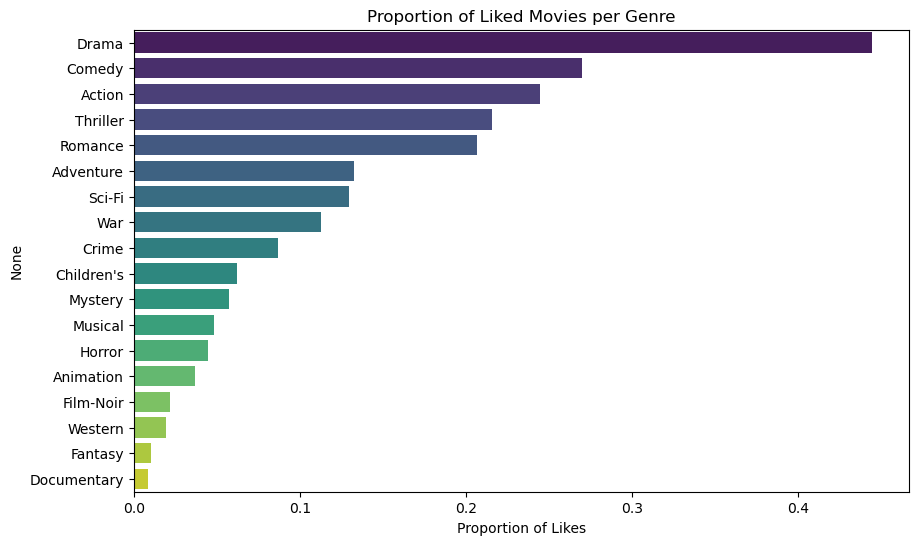

In [27]:
#Movie genres vs liked
genre_cols = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Take mean of liked for each genre column directly (no groupby)
genre_liked_rate = df[genre_cols].multiply(df['liked'], axis=0).sum() / df['liked'].sum()

# Sort descending
genre_liked_rate = genre_liked_rate.sort_values(ascending=False)
print("\nAverage liked rate per genre:\n", genre_liked_rate)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_liked_rate.values, y=genre_liked_rate.index, palette='viridis')
plt.xlabel('Proportion of Likes')
plt.title('Proportion of Liked Movies per Genre')
plt.show()


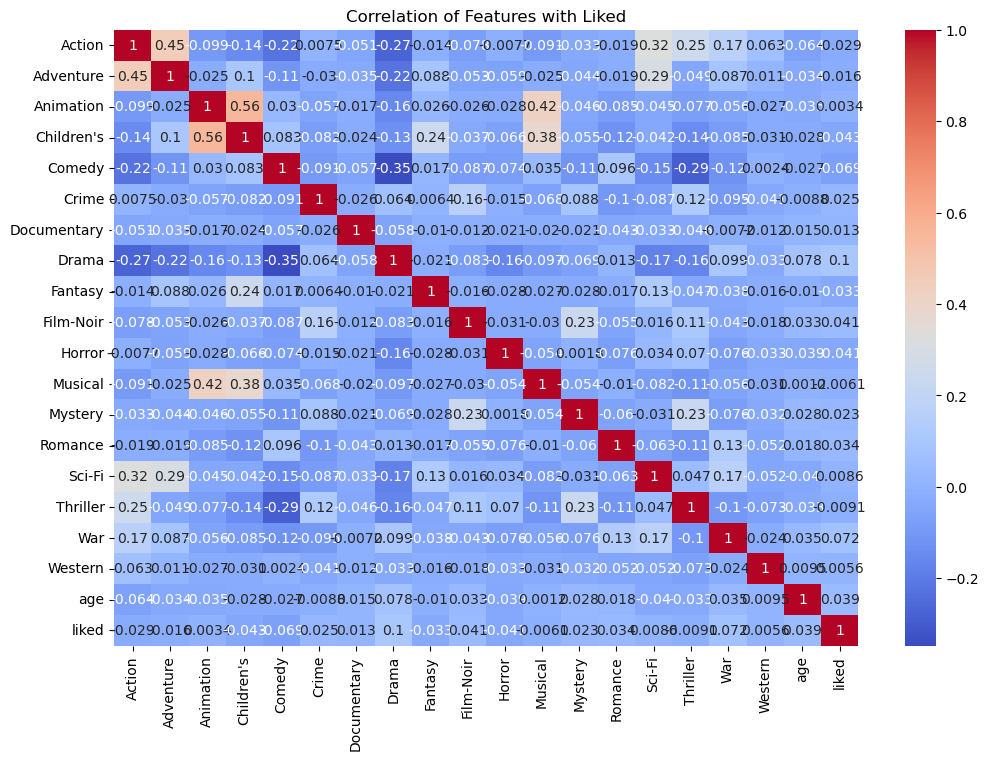

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df[genre_cols + ['age', 'liked']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Liked')
plt.show()

In [29]:
# List of columns to drop
cols_to_drop = ['user_id', 'item_id', 'timestamp', 'zip_code', 'movie_id', 'title', 'release_date']

# Drop them in-place and keep the name df
df = df.drop(columns=cols_to_drop)



In [30]:
!pip install scikit-learn

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)

In [32]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [33]:
len(df_train), len(df_val), len(df_test)

(59994, 19998, 19999)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
y_train = df_train.liked.values
y_val = df_val.liked.values
y_test = df_test.liked.values

del df_train['liked']
del df_val['liked']
del df_test['liked']

In [36]:
X_train = df_train
X_val = df_val
X_test = df_test

In [37]:
X_train = X_train.drop(columns=['rating'])
X_val = X_val.drop(columns=['rating'])
X_test = X_test.drop(columns=['rating'])


In [38]:
df.dtypes

rating          int64
age             int64
gender         object
occupation     object
unknown         int64
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
liked           int64
dtype: object

In [39]:
cat_cols = ['gender', 'occupation']
num_cols = ['age']  # already numeric
genre_cols = [col for col in X_train.columns if col not in cat_cols + num_cols]

In [40]:
# One-hot encode categorical columns

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(X_train[cat_cols])

def preprocess(X):
    cat_encoded = encoder.transform(X[cat_cols])
    cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat_cols), index=X.index)
    X_processed = pd.concat([X[num_cols + genre_cols], cat_encoded_df], axis=1)
    return X_processed

X_train_proc = preprocess(X_train)
X_val_proc = preprocess(X_val)
X_test_proc = preprocess(X_test)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_proc)
X_val_scaled = scaler.transform(X_val_proc)
X_test_scaled = scaler.transform(X_test_proc)

## Baseline Models

In [42]:
# Logistic Regression (scaled)
lr_baseline = LogisticRegression(max_iter=1000, solver='liblinear')
lr_baseline.fit(X_train_scaled, y_train)
y_val_pred_lr = lr_baseline.predict(X_val_scaled)
y_val_prob_lr = lr_baseline.predict_proba(X_val_scaled)[:,1]

In [43]:
# Decision Tree (no tuning)
dt_baseline = DecisionTreeClassifier(random_state=1)
dt_baseline.fit(X_train_proc, y_train)
y_val_pred_dt = dt_baseline.predict(X_val_proc)

In [44]:
# Random Forest (no tuning)
rf_baseline = RandomForestClassifier(n_estimators=100, random_state=1)
rf_baseline.fit(X_train_proc, y_train)
y_val_pred_rf = rf_baseline.predict(X_val_proc)

## Tuned Decision Tree

In [45]:
dt_params = {
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'criterion': ['gini','entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1),
                       param_grid=dt_params,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
dt_grid.fit(X_train_proc, y_train)
best_dt = dt_grid.best_estimator_
y_val_pred_dt_tuned = best_dt.predict(X_val_proc)

## Tuned Random Forest

In [46]:
rf_params = {
    'n_estimators': [100,200],
    'max_depth': [None,5,10],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'criterion': ['gini','entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=1),
                       param_grid=rf_params,
                       cv=3,
                       scoring='accuracy',
                       n_jobs=-1)
rf_grid.fit(X_train_proc, y_train)
best_rf = rf_grid.best_estimator_
y_val_pred_rf_tuned = best_rf.predict(X_val_proc)


In [47]:
#Function to print metrics

def print_metrics(y_true, y_pred, y_prob=None, model_name="Model"):
    print(f"=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    if y_prob is not None:
        print("ROC AUC:", roc_auc_score(y_true, y_prob))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

In [48]:
#Evaluate Baseline Models on Validation

print_metrics(y_val, y_val_pred_lr, y_val_prob_lr, "Logistic Regression (Baseline)")
print_metrics(y_val, y_val_pred_dt, model_name="Decision Tree (Baseline)")
print_metrics(y_val, y_val_pred_rf, model_name="Random Forest (Baseline)")

=== Logistic Regression (Baseline) ===
Accuracy: 0.5836583658365837
Precision: 0.5964811901015592
Recall: 0.7565312046444121
F1 Score: 0.6670399104214988
ROC AUC: 0.6031682995756489

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.37      0.44      8974
           1       0.60      0.76      0.67     11024

    accuracy                           0.58     19998
   macro avg       0.58      0.56      0.56     19998
weighted avg       0.58      0.58      0.57     19998

Confusion Matrix:
 [[3332 5642]
 [2684 8340]]


=== Decision Tree (Baseline) ===
Accuracy: 0.5944594459445944
Precision: 0.6361427770510185
Recall: 0.6175616835994194
F1 Score: 0.62671453557949

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56      8974
           1       0.64      0.62      0.63     11024

    accuracy                           0.59     19998
   macro avg       0.59      

In [49]:
#Evaluate Tuned Models on Validation

print_metrics(y_val, y_val_pred_dt_tuned, model_name="Decision Tree (Tuned)")
print_metrics(y_val, y_val_pred_rf_tuned, model_name="Random Forest (Tuned)")

=== Decision Tree (Tuned) ===
Accuracy: 0.6006600660066007
Precision: 0.6370938628158844
Recall: 0.6403301886792453
F1 Score: 0.6387079261672095

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.55      0.55      8974
           1       0.64      0.64      0.64     11024

    accuracy                           0.60     19998
   macro avg       0.60      0.60      0.60     19998
weighted avg       0.60      0.60      0.60     19998

Confusion Matrix:
 [[4953 4021]
 [3965 7059]]


=== Random Forest (Tuned) ===
Accuracy: 0.6207620762076208
Precision: 0.6375119923249121
Recall: 0.7233309143686503
F1 Score: 0.6777154513003569

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.49      0.54      8974
           1       0.64      0.72      0.68     11024

    accuracy                           0.62     19998
   macro avg       0.62      0.61      0.61     19998
weighted avg 

## Model Comparison

In [50]:
# Validation + Test Metrics Summary

# Function to collect metrics for both val and test
def get_metrics_full(y_val_true, y_val_pred, y_test_true, y_test_pred, model_name):
    return {
        'Model': model_name,
        # Validation metrics
        'Val Accuracy': accuracy_score(y_val_true, y_val_pred),
        'Val Precision': precision_score(y_val_true, y_val_pred),
        'Val Recall': recall_score(y_val_true, y_val_pred),
        'Val F1': f1_score(y_val_true, y_val_pred),
        # Test metrics
        'Test Accuracy': accuracy_score(y_test_true, y_test_pred),
        'Test Precision': precision_score(y_test_true, y_test_pred),
        'Test Recall': recall_score(y_test_true, y_test_pred),
        'Test F1': f1_score(y_test_true, y_test_pred)
    }

# Collect metrics for all models
metrics_list_full = []

# Logistic Regression (scaled)
y_test_pred_lr = lr_baseline.predict(X_test_scaled)
metrics_list_full.append(get_metrics_full(y_val, y_val_pred_lr, y_test, y_test_pred_lr, "Logistic Regression (Baseline)"))

# Decision Tree (baseline)
y_test_pred_dt = dt_baseline.predict(X_test_proc)
metrics_list_full.append(get_metrics_full(y_val, y_val_pred_dt, y_test, y_test_pred_dt, "Decision Tree (Baseline)"))

# Random Forest (baseline)
y_test_pred_rf = rf_baseline.predict(X_test_proc)
metrics_list_full.append(get_metrics_full(y_val, y_val_pred_rf, y_test, y_test_pred_rf, "Random Forest (Baseline)"))

# Decision Tree (tuned)
y_test_pred_dt_tuned = best_dt.predict(X_test_proc)
metrics_list_full.append(get_metrics_full(y_val, y_val_pred_dt_tuned, y_test, y_test_pred_dt_tuned, "Decision Tree (Tuned)"))

# Random Forest (tuned)
y_test_pred_rf_tuned = best_rf.predict(X_test_proc)
metrics_list_full.append(get_metrics_full(y_val, y_val_pred_rf_tuned, y_test, y_test_pred_rf_tuned, "Random Forest (Tuned)"))

# Create summary DataFrame
summary_full_df = pd.DataFrame(metrics_list_full)

# Sort by Validation Accuracy descending
summary_full_df = summary_full_df.sort_values(by='Val Accuracy', ascending=False).reset_index(drop=True)

print("=== Validation + Test Metrics Summary ===")
print(summary_full_df)


=== Validation + Test Metrics Summary ===
                            Model  Val Accuracy  Val Precision  Val Recall  \
0           Random Forest (Tuned)      0.620762       0.637512    0.723331   
1        Random Forest (Baseline)      0.605261       0.632807    0.676433   
2           Decision Tree (Tuned)      0.600660       0.637094    0.640330   
3        Decision Tree (Baseline)      0.594459       0.636143    0.617562   
4  Logistic Regression (Baseline)      0.583658       0.596481    0.756531   

     Val F1  Test Accuracy  Test Precision  Test Recall   Test F1  
0  0.677715       0.626581        0.649837     0.726560  0.686060  
1  0.653893       0.609280        0.644702     0.677767  0.660821  
2  0.638708       0.605480        0.649807     0.645179  0.647485  
3  0.626715       0.597180        0.648545     0.617131  0.632448  
4  0.667040       0.590030        0.607931     0.760306  0.675634  


In [51]:
# Find best performing model based on Validation Accuracy
best_model_row = summary_full_df.loc[summary_full_df['Val Accuracy'].idxmax()]

print("=== Best Performing Model ===")
print(f"Model: {best_model_row['Model']}")
print(f"Validation Accuracy: {best_model_row['Val Accuracy']:.4f}")
print(f"Test Accuracy: {best_model_row['Test Accuracy']:.4f}")
print(f"Validation F1 Score: {best_model_row['Val F1']:.4f}")
print(f"Test F1 Score: {best_model_row['Test F1']:.4f}")


=== Best Performing Model ===
Model: Random Forest (Tuned)
Validation Accuracy: 0.6208
Test Accuracy: 0.6266
Validation F1 Score: 0.6777
Test F1 Score: 0.6861


In [55]:
import pickle

best_model = best_rf

# Save the model to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [58]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\Elitebook\Downloads\ml-100k\ml-100k


In [59]:
print(os.listdir())  # Lists all files in the current folder

['allbut.pl', 'best_model.pkl', 'combined_dataset.csv', 'mku.sh', 'README', 'u.data', 'u.genre', 'u.info', 'u.item', 'u.occupation', 'u.user', 'u1.base', 'u1.test', 'u2.base', 'u2.test', 'u3.base', 'u3.test', 'u4.base', 'u4.test', 'u5.base', 'u5.test', 'ua.base', 'ua.test', 'ub.base', 'ub.test']


In [60]:
import os

# Get the folder where the notebook is running
notebook_dir = os.getcwd()
print("Notebook folder:", notebook_dir)

# Save CSV in this folder
csv_path = os.path.join(notebook_dir, 'combined_dataset.csv')
df.to_csv(csv_path, index=False)
print(f"✅ CSV saved at {csv_path}")


Notebook folder: C:\Users\Elitebook\Downloads\ml-100k\ml-100k
✅ CSV saved at C:\Users\Elitebook\Downloads\ml-100k\ml-100k\combined_dataset.csv


In [61]:
import os
notebook_folder = os.path.dirname(os.path.abspath("__file__"))
print("Notebook folder:", notebook_folder)


Notebook folder: C:\Users\Elitebook\Downloads\ml-100k\ml-100k


In [62]:
import shutil
from pathlib import Path

# Current location of the files (dataset folder)
dataset_folder = r"C:\Users\Elitebook\Downloads\ml-100k\ml-100k"
csv_file = Path(dataset_folder) / "combined_dataset.csv"
model_file = Path(dataset_folder) / "best_model.pkl"

# Target location (notebook folder)
notebook_folder = r"C:\Users\Elitebook\Downloads\ml-100k"  # folder where your notebook is

# Move the files
shutil.move(str(csv_file), str(Path(notebook_folder) / "combined_dataset.csv"))
shutil.move(str(model_file), str(Path(notebook_folder) / "best_model.pkl"))

print("✅ Files moved to notebook folder:")
print(notebook_folder)


✅ Files moved to notebook folder:
C:\Users\Elitebook\Downloads\ml-100k


In [63]:
import os

# List all files in current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)
print(os.listdir(cwd))


Current working directory: C:\Users\Elitebook\Downloads\ml-100k\ml-100k
['.ipynb_checkpoints', 'allbut.pl', 'mku.sh', 'README', 'u.data', 'u.genre', 'u.info', 'u.item', 'u.occupation', 'u.user', 'u1.base', 'u1.test', 'u2.base', 'u2.test', 'u3.base', 'u3.test', 'u4.base', 'u4.test', 'u5.base', 'u5.test', 'ua.base', 'ua.test', 'ub.base', 'ub.test']


In [64]:
from pathlib import Path

# Folder where you want to save the file (notebook folder)
notebook_folder = r"C:\Users\Elitebook\Downloads\ml-100k"
requirements_file = Path(notebook_folder) / "requirements.txt"

# List of required packages for your project
requirements = """
flask
numpy
pandas
scikit-learn
seaborn
"""

# Write to requirements.txt
with open(requirements_file, 'w') as f:
    f.write(requirements.strip())

print("✅ requirements.txt created at:", requirements_file)


✅ requirements.txt created at: C:\Users\Elitebook\Downloads\ml-100k\requirements.txt
